In [ ]:
def secretary_problem_strategy(n: int, m: int, candidate_ranks: list) -> int:
    if not (0 <= m < n):
        raise ValueError("m must be less than n and non-negative.")
    if len(candidate_ranks) != n:
        raise ValueError(f"Length of candidate_ranks ({len(candidate_ranks)}) must be equal to n ({n}).")

    # Phase 1: Sample observation
    best_rank_in_sample = float('inf')
    if m > 0:
        for i in range(m):
            if candidate_ranks[i] < best_rank_in_sample:
                best_rank_in_sample = candidate_ranks[i]

    # Phase 2: Selection
    for i in range(m, n):
        if candidate_ranks[i] < best_rank_in_sample:
            return candidate_ranks[i] # Select this candidate

    # If no candidate was chosen in Phase 2, choose the last candidate
    return candidate_ranks[n - 1]

def is_successful(chosen_rank: int, s: int) -> bool:
    if s < 1:
        raise ValueError("Success criterion 's' must be at least 1.")
    return chosen_rank <= s

print("Secretary Problem strategy and success criteria functions defined.")

Secretary Problem strategy and success criteria functions defined.


In [ ]:
import numpy as np

n = 100

s_values = [1, 3, 5, 10]

# number of Monte Carlo simulations to run for each (s, m) pair
num_simulations = 10000

simulation_results = {s: {} for s in s_values}

print(f"Starting Monte Carlo simulations for n={n} candidates...")

for s in s_values:
    print(f"  Simulating for s={s}...")

    for m in range(n):
        # For each (s, m) pair, initialize a counter for successful simulations
        successful_runs = 0

        # Inside the m loop, iterate num_simulations times
        for _ in range(num_simulations):
            # a. Generate a random permutation of candidate ranks from 1 to n.
            candidate_ranks = np.random.permutation(np.arange(1, n + 1)).tolist()

            # b. Call the secretary_problem_strategy function
            chosen_rank = secretary_problem_strategy(n, m, candidate_ranks)

            # c. Call the is_successful function
            if is_successful(chosen_rank, s):
                successful_runs += 1

        simulation_results[s][m] = successful_runs

print("Monte Carlo simulations completed.")

print("\nSimulation Results (Number of Successes per s and m):\n")
for s, m_results in simulation_results.items():
    print(f"s={s}: {m_results}")

Starting Monte Carlo simulations for n=100 candidates...
  Simulating for s=1...
  Simulating for s=3...
  Simulating for s=5...
  Simulating for s=10...
Monte Carlo simulations completed.

Simulation Results (Number of Successes per s and m):

s=1: {0: 95, 1: 481, 2: 889, 3: 1033, 4: 1305, 5: 1498, 6: 1676, 7: 1941, 8: 2071, 9: 2254, 10: 2351, 11: 2407, 12: 2602, 13: 2678, 14: 2768, 15: 2943, 16: 3069, 17: 2916, 18: 3123, 19: 3143, 20: 3265, 21: 3281, 22: 3402, 23: 3369, 24: 3474, 25: 3475, 26: 3502, 27: 3508, 28: 3591, 29: 3656, 30: 3587, 31: 3647, 32: 3746, 33: 3717, 34: 3827, 35: 3755, 36: 3797, 37: 3700, 38: 3681, 39: 3731, 40: 3756, 41: 3697, 42: 3608, 43: 3698, 44: 3732, 45: 3693, 46: 3611, 47: 3643, 48: 3640, 49: 3509, 50: 3422, 51: 3510, 52: 3457, 53: 3395, 54: 3384, 55: 3406, 56: 3247, 57: 3218, 58: 3141, 59: 3123, 60: 3150, 61: 2994, 62: 2920, 63: 2963, 64: 2890, 65: 2759, 66: 2677, 67: 2784, 68: 2650, 69: 2614, 70: 2498, 71: 2493, 72: 2407, 73: 2298, 74: 2250, 75: 2151, 76:

## CalculateSuccessProbabilities

In [ ]:
success_probabilities = {s: {} for s in s_values}

for s in s_values:
    for m in range(n):
        successful_runs = simulation_results[s][m]
        probability = successful_runs / num_simulations
        success_probabilities[s][m] = probability

print("\nSuccess Probabilities (P_success(m) per s and m):\n")
for s, m_probs in success_probabilities.items():
    print(f"s={s}: {m_probs}")


Success Probabilities (P_success(m) per s and m):

s=1: {0: 0.0095, 1: 0.0481, 2: 0.0889, 3: 0.1033, 4: 0.1305, 5: 0.1498, 6: 0.1676, 7: 0.1941, 8: 0.2071, 9: 0.2254, 10: 0.2351, 11: 0.2407, 12: 0.2602, 13: 0.2678, 14: 0.2768, 15: 0.2943, 16: 0.3069, 17: 0.2916, 18: 0.3123, 19: 0.3143, 20: 0.3265, 21: 0.3281, 22: 0.3402, 23: 0.3369, 24: 0.3474, 25: 0.3475, 26: 0.3502, 27: 0.3508, 28: 0.3591, 29: 0.3656, 30: 0.3587, 31: 0.3647, 32: 0.3746, 33: 0.3717, 34: 0.3827, 35: 0.3755, 36: 0.3797, 37: 0.37, 38: 0.3681, 39: 0.3731, 40: 0.3756, 41: 0.3697, 42: 0.3608, 43: 0.3698, 44: 0.3732, 45: 0.3693, 46: 0.3611, 47: 0.3643, 48: 0.364, 49: 0.3509, 50: 0.3422, 51: 0.351, 52: 0.3457, 53: 0.3395, 54: 0.3384, 55: 0.3406, 56: 0.3247, 57: 0.3218, 58: 0.3141, 59: 0.3123, 60: 0.315, 61: 0.2994, 62: 0.292, 63: 0.2963, 64: 0.289, 65: 0.2759, 66: 0.2677, 67: 0.2784, 68: 0.265, 69: 0.2614, 70: 0.2498, 71: 0.2493, 72: 0.2407, 73: 0.2298, 74: 0.225, 75: 0.2151, 76: 0.2061, 77: 0.203, 78: 0.1952, 79: 0.187, 80:

## Plot

Generating plots for success probabilities...


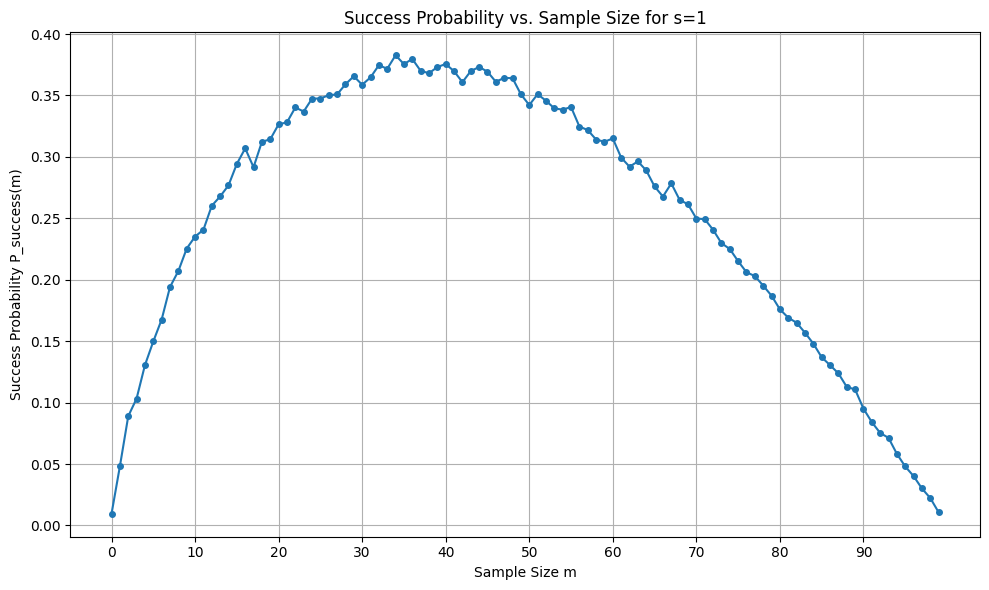

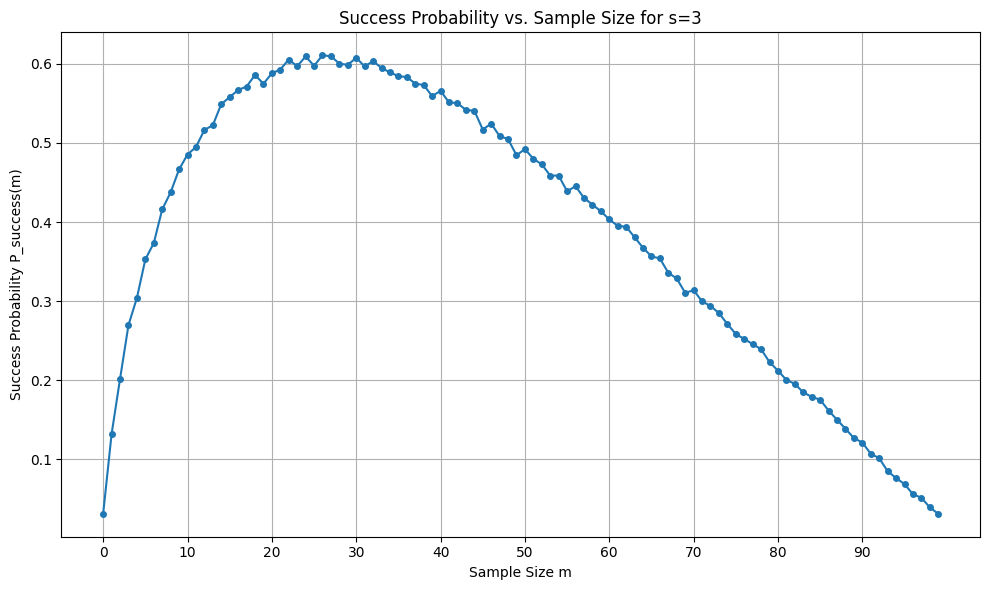

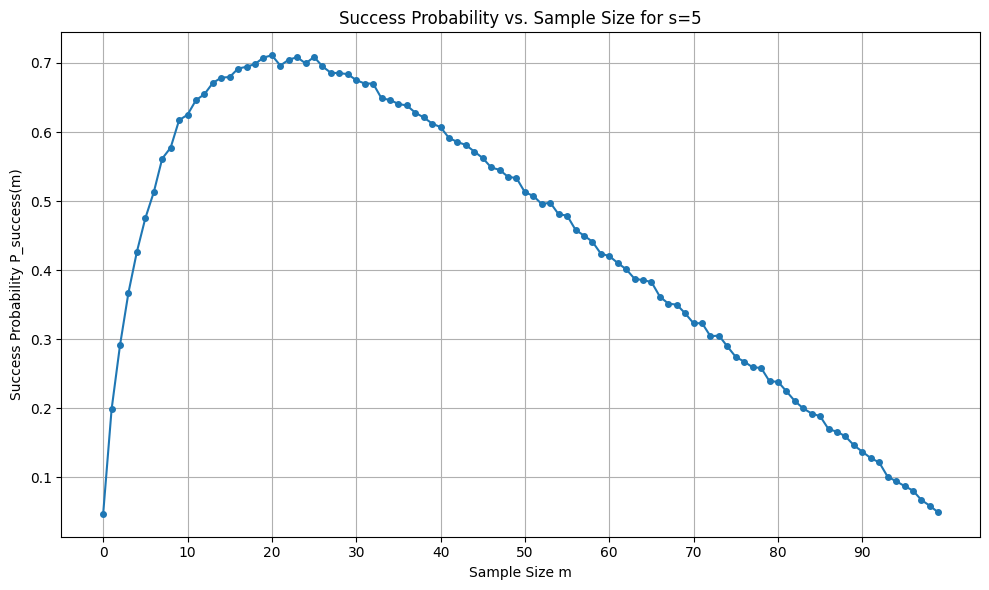

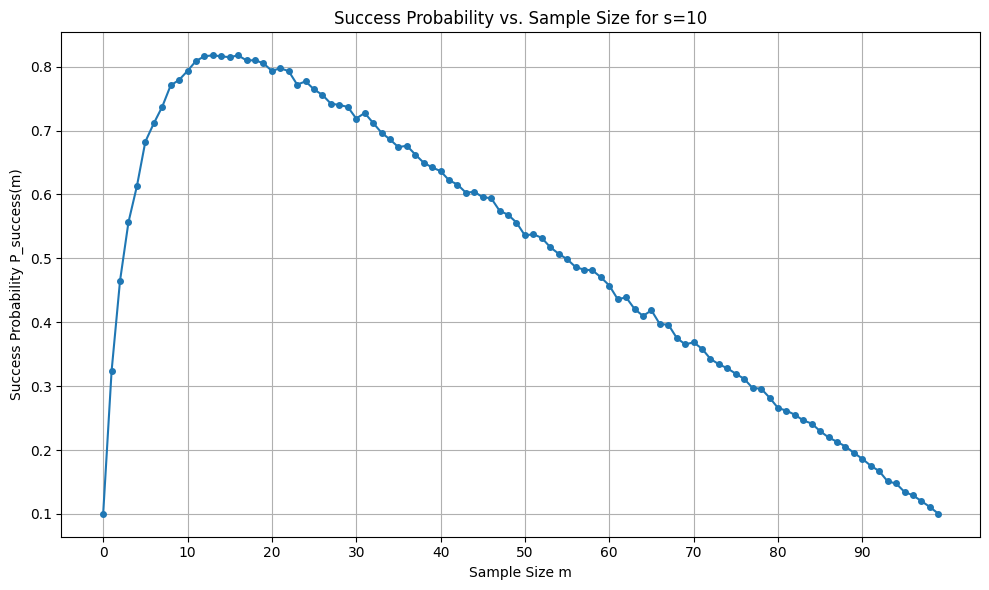

Plots generated successfully.


In [ ]:

import matplotlib.pyplot as plt
print("Generating plots for success probabilities...")

for s in s_values:
    m_values = list(success_probabilities[s].keys())
    probabilities = list(success_probabilities[s].values())

    plt.figure(figsize=(10, 6))
    plt.plot(m_values, probabilities, marker='o', linestyle='-', markersize=4)
    plt.title(f'Success Probability vs. Sample Size for s={s}')
    plt.xlabel('Sample Size m')
    plt.ylabel('Success Probability P_success(m)')
    plt.grid(True)
    plt.xticks(np.arange(0, n, 10))
    plt.tight_layout()
    plt.show()

print("Plots generated successfully.")

In [ ]:
print("Identifying optimal 'm' for each success criterion 's'...")

optimal_m_results = {}

for s, m_probs in success_probabilities.items():
    optimal_m = None
    max_probability = -1

    for m, prob in m_probs.items():
        if prob > max_probability:
            max_probability = prob
            optimal_m = m

    optimal_m_results[s] = {'optimal_m': optimal_m, 'max_success_rate': max_probability}

for s, results in optimal_m_results.items():
    print(f"For s={s}: Optimal m = {results['optimal_m']}, Max Success Rate = {results['max_success_rate']:.4f}")

Identifying optimal 'm' for each success criterion 's'...
For s=1: Optimal m = 34, Max Success Rate = 0.3827
For s=3: Optimal m = 26, Max Success Rate = 0.6107
For s=5: Optimal m = 20, Max Success Rate = 0.7111
For s=10: Optimal m = 13, Max Success Rate = 0.8178
